In [14]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# basic imports 
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Build dataset

In [13]:
from proj1_helpers import load_csv_data 
from outliers import handle_outliers
from standard import standardize

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

# handle outliers
X, y = handle_outliers(input_data_raw, y_raw, -999, True)

# standardize
X, mean_x, std_x = standardize(X)

samples with -999 are removed from the dataset 


# Step-wise ridge-regression backward

In [8]:
# initialize with all features
ind_f = range(1,30)

# store
ind_f_tot = []
loss_tot = []
degree_opt_tot = []

# parameters
degree_min = 1
degree_max = 5
lambda_ = 0
k_fold = 10

for i in range(1,30):
    
    rmse_te_i = float('inf')
    degree_opt_i = np.empty((1,))
    ind_f_i = np.empty((1,30-i))
    
    for j in range(1,30-i):
        
        ind_f_j = np.delete(ind_f, j)

        # ----------------------------- fit  
        degree_opt_j, rmse_tr_j, rmse_te_j = cross_validation_degree_ridge_regression(y, X[:,ind_f_tmp], lambda_, degree_min, degree_max, k_fold)
        
        # ----------------------------- compare  
        if rmse_te_j < rmse_te_i:
            rmse_te_i = rmse_te_j
            degree_opt_i = degree_opt_j
            ind_f_i = ind_f_j

    # ----------------------------- update 
    ind_f_tot.append(ind_f_i)
    loss_tot.append(rmse_te_i)
    degree_opt_tot.append(degree_opt_tot)

    

In [11]:

a = np.empty((2,))
print(a)
a[1]=1
print(a)

[  2.12199579e-314   4.94065646e-324]
[  2.12199579e-314   1.00000000e+000]


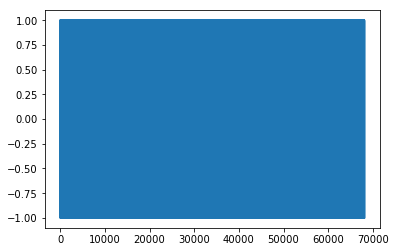

In [15]:
plt.plot(y)

In [22]:
def f(a, b, f, e, c='c1', d=0):
    print(a)
    print(b)
    if c=='c1':
        print(f)
    print(e)
    print(d)

f(1,2,3,4,'c1')

1
2
3
4
0


In [23]:
np.logspace(-1,1,10)

array([  0.1       ,   0.16681005,   0.27825594,   0.46415888,
         0.77426368,   1.29154967,   2.15443469,   3.59381366,
         5.9948425 ,  10.        ])